## T-Test Code

In [3]:
import numpy as np
from scipy import stats

In [4]:
N = 10 # number of samples
a = np.random.randn(N) + 2 # 10 samples from gaussian dist. with mean 2
b = np.random.randn(N) # 10 samples from gaussian dist (normal)

In [5]:
var_a = a.var(ddof=1) # unbiased estimates , N-1 in deno (ddof=1)
var_b = b.var(ddof=1) #

In [6]:
s = np.sqrt((var_a + var_b)/2)
t = (a.mean() - b.mean()) / (s * np.sqrt(2.0/N))
df = 2*N - 2

In [7]:
p = 1 - stats.t.cdf(t, df=df)
print("t is {}, p is {}".format(t, p))

t is 2.4319257426241356, p is 0.012841862066055976


In [8]:
## checking from scipy function
t2, p2 = stats.ttest_ind(a, b)
print("t is {}, p is {}".format(t2, p2))

t is 2.4319257426241356, p is 0.025683724132112066


## CTR T-Test

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv("advertisement_clicks.csv")

In [22]:
df.head()

,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [28]:
df.shape

(2000, 2)

In [23]:
actions_A = df.loc[df["advertisement_id"] == "A", "action"].values
actions_B = df.loc[df["advertisement_id"] == "B", "action"].values

In [27]:
actions_B.shape

(1000,)

In [35]:
## Assumed equal standard deviation for A and B
t, p = stats.ttest_ind(actions_A, actions_B)

In [36]:
t

-3.2211732138019786

In [37]:
p

0.0012971905467125246

In [39]:
## For Welch test, standard deviations are not the same
# For manual code, see the repo (coded that big formula)
t, p = stats.ttest_ind(a, b, equal_var=False)
print("Welch's t-test:")
print("t:\t", t, "p:\t", p)

Welch's t-test:
t:	 2.43192574262 p:	 0.0258491828991


## Chi-Squared Test

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [58]:
class DataGenerator:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
        
    def next(self):
        click1 = 1 if (np.random.random() < self.p1) else 0
        click2 = 1 if (np.random.random() < self.p2) else 0
        return click1, click2
    
def get_p_value(T):
    # given the matrix or contingency table , see the formula for Chi2 Statistic
    det = T[0, 0]*T[1, 1] - T[0, 1]*T[1, 0]
    c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:, 0].sum() / T[:, 1].sum()
    p = 1 - chi2.cdf(x=c2, df=1)
    return p
    
def run_experiment(p1, p2, N):
    data = DataGenerator(p1, p2)
    p_values = np.empty(N)
    T = np.zeros((2, 2)).astype(np.float32)
    for i in range(N):
        c1, c2 = data.next()
        T[0, c1] += 1
        T[1, c2] += 1
        if i < 10:
            p_values[i] = None
        else:
            p_values[i] = get_p_value(T)
    print(T)
    plt.plot(p_values)
    plt.plot(np.ones(N)*0.05)
    plt.show()

[[ 18016.   1984.]
 [ 17853.   2147.]]


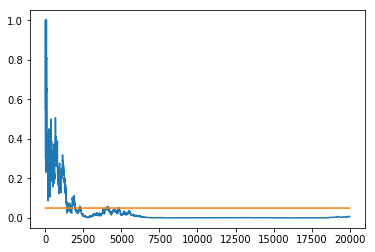

In [59]:
run_experiment(0.1, 0.11, 20000)

## Chi-2 test, advertisements_clicks.csv

** Used for CTR or Conversion, when the distribution is not gaussian **

** Best part about using contingency tables is that you actually don't need the sample sizes to be comaparable for the distributions and can work with varied sample sizes for the different distributions **

In [75]:
import pandas as pd

In [76]:
df = pd.read_csv("advertisement_clicks.csv")

In [77]:
actions_A = df.loc[df["advertisement_id"]=="A", "action"].values
actions_B = df.loc[df["advertisement_id"]=="B", "action"].values

In [81]:
actions_A_click = np.sum(actions_A)
actions_A_no_click = np.size(actions_A) - np.sum(actions_A)
actions_B_click = np.sum(actions_B)
actions_B_no_click = np.size(actions_B) - np.sum(actions_B)

In [82]:
T = np.array([[actions_A_click, actions_A_no_click], [actions_B_click, actions_B_no_click]])
T

array([[304, 696],
       [372, 628]])

In [83]:
def get_p_value(T):
    # given the matrix or contingency table , see the formula for Chi2 Statistic
    det = T[0, 0]*T[1, 1] - T[0, 1]*T[1, 0]
    c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:, 0].sum() / T[:, 1].sum()
    p = 1 - chi2.cdf(x=c2, df=1)
    return p
print(get_p_value(T))

0.00130695027321
